Classify handwritten digits using the famous MNIST data

The goal is to take a handwritten single digit and recognize it. The were taken from MINISt datset which is also available as one of Kaggle competitions: https://www.kaggle.com/c/digit-recognizer/data. The approch to this computer vision problem is to train diffrent machine learnin algorithms as SVM and random forest and compare them.

Importing necessary libraries:


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn import manifold

Importing dataset:

In [3]:
df=pd.read_csv('train.csv',header=None)
XTest=pd.read_csv('test.csv',header=None)

Separate the train set to the X that contains the images of digits and y that has the labels of images:

In [4]:
y=df.iloc[0:10000,0]
X=df.iloc[0:10000,1::]

In [5]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,
                                                random_state=2, test_size=0.2)
print(Xtrain.shape, Xtest.shape)

(8000, 784) (2000, 784)


C:\Users\alahghol\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [168]:
from sklearn import svm
classifier = svm.SVC(kernel='poly',degree=2, C=0.62, coef0=0.48, cache_size=200 ,decision_function_shape= 'ovo')
classifier.fit(Xtrain,ytrain)
ypred=classifier.predict(Xtest)

In [7]:
from sklearn import svm
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from time import time
classifier = svm.SVC(kernel='poly')
param_grid_svm = {'degree': range(1,10)}
param_grid_knn = {'n_neighbors': range(1,11)}
knn = neighbors.KNeighborsClassifier()
grid_search_svm = GridSearchCV(classifier, param_grid=param_grid_svm,verbose=50)
grid_search_knn = GridSearchCV(knn, param_grid=param_grid_knn,verbose=50)
#start = time()
grid_search_svm.fit(Xtrain, ytrain)
grid_search_knn.fit(Xtrain, ytrain)
#print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
#      % (time() - start, len(grid_search.cv_results_['params'])))
#report(grid_search.cv_results_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] degree=1 ........................................................
[CV] ......................... degree=1, score=0.909738, total=   7.9s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.4s remaining:    0.0s
[CV] degree=1 ........................................................
[CV] ......................... degree=1, score=0.908136, total=   8.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.6s remaining:    0.0s
[CV] degree=1 ........................................................
[CV] ......................... degree=1, score=0.919264, total=   8.2s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   45.6s remaining:    0.0s
[CV] degree=2 ........................................................
[CV] ......................... degree=2, score=0.947566, total=   9.8s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.0min remaining:    0.0s
[CV] degree=2 ......................................

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 11)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=50)

In [104]:
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

estimators = [('randomforest', RandomForestRegressor()), ('clf', svm.SVC(kernel='poly'))]
pipe = Pipeline(estimators)
params = dict(randomforest__n_estimators=[2, 5, 10],clf__degree=[1, 2])
grid_search = GridSearchCV(pipe, param_grid=params)
grid_search.fit(Xtrain, ytrain)

TypeError: __init__() got an unexpected keyword argument 'param_grid'

In [8]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [82]:
report(grid_search_svm.cv_results_)

Model with rank: 1
Mean validation score: 0.952 (std: 0.006)
Parameters: {'degree': 2}

Model with rank: 2
Mean validation score: 0.912 (std: 0.005)
Parameters: {'degree': 1}



In [8]:
grid_search_knn.cv_results_

{'mean_fit_time': array([ 0.49660309,  0.50920431,  0.50480469,  0.52026955,  0.49680416,
         0.49440177,  0.47840079,  0.48360078,  0.47906756,  0.48953509]),
 'mean_score_time': array([ 17.5845747 ,  17.41905689,  17.48816546,  17.82975165,
         17.45129283,  17.63657808,  16.91056339,  17.36791897,
         16.8675681 ,  17.77842704]),
 'mean_test_score': array([ 0.937375,  0.924875,  0.935625,  0.934375,  0.933   ,  0.932125,
         0.929375,  0.92925 ,  0.9275  ,  0.927875]),
 'mean_train_score': array([ 1.        ,  0.96512517,  0.9702507 ,  0.95968775,  0.95762596,
         0.95237631,  0.95087636,  0.94593872,  0.94387662,  0.94243857]),
 'param_n_neighbors': masked_array(data = [1 2 3 4 5 6 7 8 9 10],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'params': ({'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 

In [17]:
import matplotlib.lines as mlines
fig, ax = plt.subplots()
plt.plot(param_grid_svm['degree'],grid_search_svm.cv_results_['mean_test_score'],'g',marker='v')
plt.plot(param_grid_knn['n_neighbors'],grid_search_knn.cv_results_['mean_test_score'],'r',marker='v')
plt.xlabel('Poly-gree/neighbors')
plt.xlim(1,9)
plt.ylim(0.78,0.99)
plt.ylabel('test-set score')
Randomforest = mlines.Line2D([], [], color='red', marker='v',
                          markersize=6, label='K-nearest-neighbors')
SVM = mlines.Line2D([], [], color='green', marker='v',
                          markersize=6, label='SVM')
plt.legend(handles=[SVM, Randomforest])
plt.show()

In [27]:
y=df.iloc[0:48000,0]
X=df.iloc[0:48000,1::]
ypred=grid_search_svm.predict(Xtest)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=2, test_size=0.2)
classifier = svm.SVC(kernel='poly',degree=2)
classifier.fit(Xtrain,ytrain)
ypred=classifier.predict(Xtest)
print('Train set score :', classifier.score(Xtrain,ytrain))
print('Test set score :', classifier.score(Xtest,ytest))

Train set score : 1.0
Test set score : 0.974880952381


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

[[813   0   2   0   0   2   2   0   1   1]
 [  0 952   0   3   0   0   0   2   5   0]
 [  2   0 812   3   2   0   0   8   1   1]
 [  0   0   4 838   0   9   0   4   5   4]
 [  1   1   2   0 838   0   3   0   0  11]
 [  2   0   0  10   0 703   5   0   7   2]
 [  5   0   1   0   1   6 825   0   1   0]
 [  0   1   3   0   4   0   0 859   0   6]
 [  5   2   8   5   2   7   1   1 760   2]
 [  5   1   1   2  14   3   1  16   2 789]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.98       821
          1       0.99      0.99      0.99       962
          2       0.97      0.98      0.98       829
          3       0.97      0.97      0.97       864
          4       0.97      0.98      0.98       856
          5       0.96      0.96      0.96       729
          6       0.99      0.98      0.98       839
          7       0.97      0.98      0.97       873
          8       0.97      0.96      0.97       793
          9       0.97      0.95      

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1),2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
Normalized confusion matrix


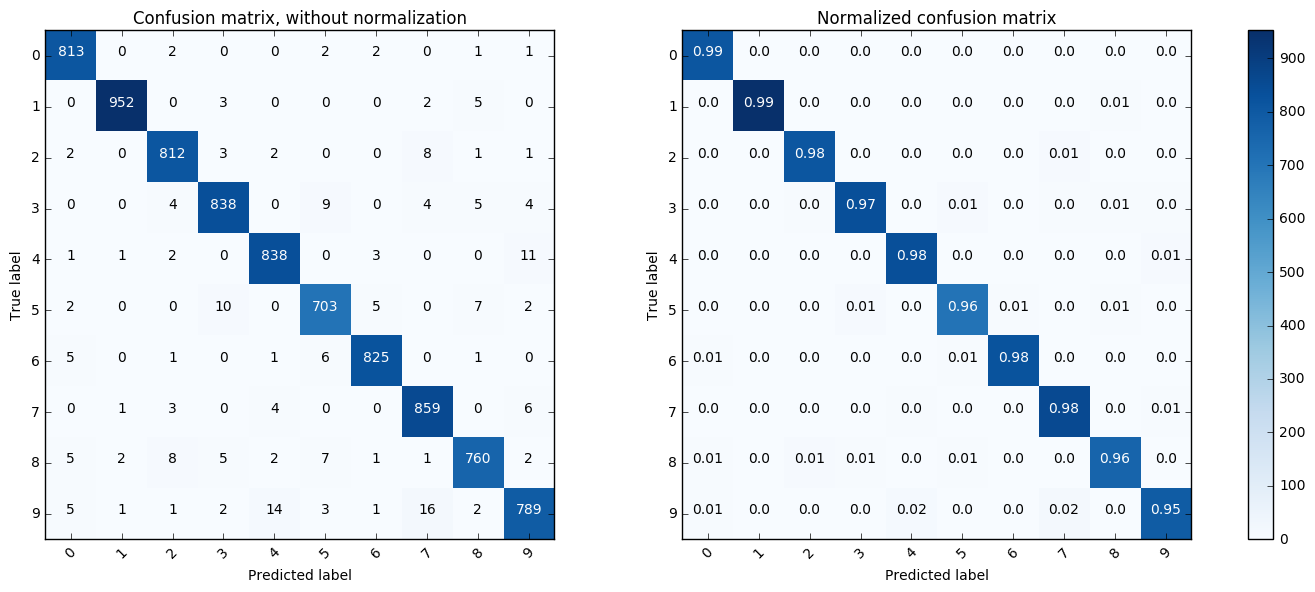

In [22]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(ytest, ypred)
#print(cnf_matrix)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (18,6), dpi=150)
plt.subplot(1,2,1)
plot_confusion_matrix(cnf_matrix, classes=range(10),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(1,2,2)
plot_confusion_matrix(cnf_matrix, classes=range(10), normalize=True,
                      title='Normalized confusion matrix')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
degree_2d_range = [1,2,3,4,5,6,7]
classifiers = []
for d in degree_2d_range:
    clf = svm.SVC(kernel='poly',degree=d,decision_function_shape= 'ovo')
    clf.fit(Xtrain, ytrain)
    score_train=clf.score(Xtrain, ytrain, sample_weight=None)
    score_test=clf.score(Xtest, ytest, sample_weight=None)
    classifiers.append([score_train, score_test, clf])

In [ ]:
plt.plot(degree_2d_range,np.array(classifiers)[:,0])
plt.show()

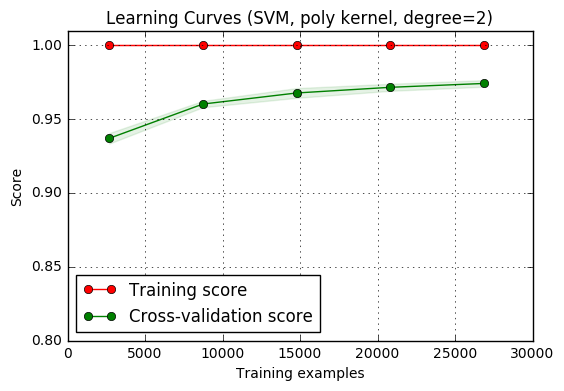

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X=Xtrain
y=ytrain

title = "Learning Curves (SVM, poly kernel, degree=2)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = svm.SVC(kernel='poly',degree = 2,decision_function_shape= 'ovo')
plot_learning_curve(estimator, title, X, y, (0.8, 1.01), cv=cv, n_jobs=4)

plt.show()

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.9748809523809524

In [24]:
Ypred=classifier.predict(XTest)
np.savetxt('submission.csv',Ypred,delimiter=',',fmt='%.2f')